# Working with data with a regression example

In [1]:
# Example modified from https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
# Use this link for managing conda environemnts
# https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html
#
# conda create -n uitai python=3.12
# conda activate uitai
# conda install -c conda-forge numpy scipy matplotlib
# conda install conda-forge::ipython
# pip install nbformat nbclient
# conda install conda-forge::scikit-learn

import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from copy import deepcopy

## Generate sample data

In [2]:
data_config_1d = {
'N_SAMPLES' : 250,
'NOISE_PERCENT': 10,
}

X = np.sort(5 * np.random.rand(data_config_1d['N_SAMPLES'], 1), axis=0)
y_true = np.sin(X).ravel()
y = deepcopy(y_true)

# add noise to targets
sampling = 100 // data_config_1d['NOISE_PERCENT']
noise_len = len(y[::sampling])
y[::sampling] += 3 * (0.5 - np.random.rand(noise_len))


## Visulaize data

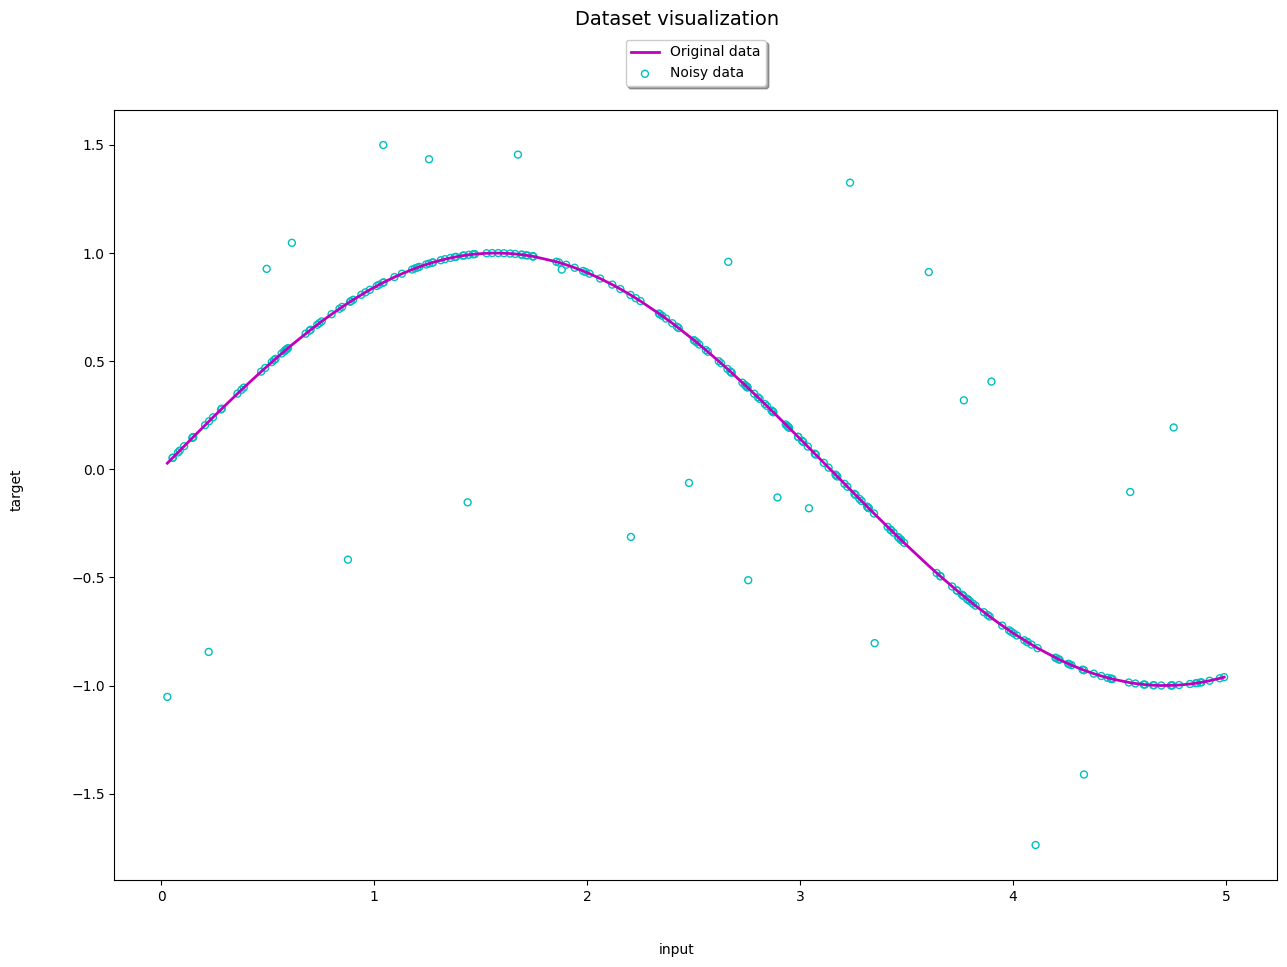

In [3]:
datasets = [y_true, y]
kernel_label = ["Original", "Noisy"]
model_color = ["m", "c"]

lw = 2
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharey=True)
axes.plot(
    X,
    y_true,
    color=model_color[0],
    lw=lw,
    label="{} data".format(kernel_label[0]),
)
axes.scatter(
    X,
    y,
    facecolor="none",
    edgecolor=model_color[1],
    s=25,
    label="{} data".format(kernel_label[1]),
)
axes.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.1),
    ncol=1,
    fancybox=True,
    shadow=True,
)

fig.text(0.5, 0.04, "input", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Dataset visualization", fontsize=14)
plt.show()

## Fit regression model

In [4]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

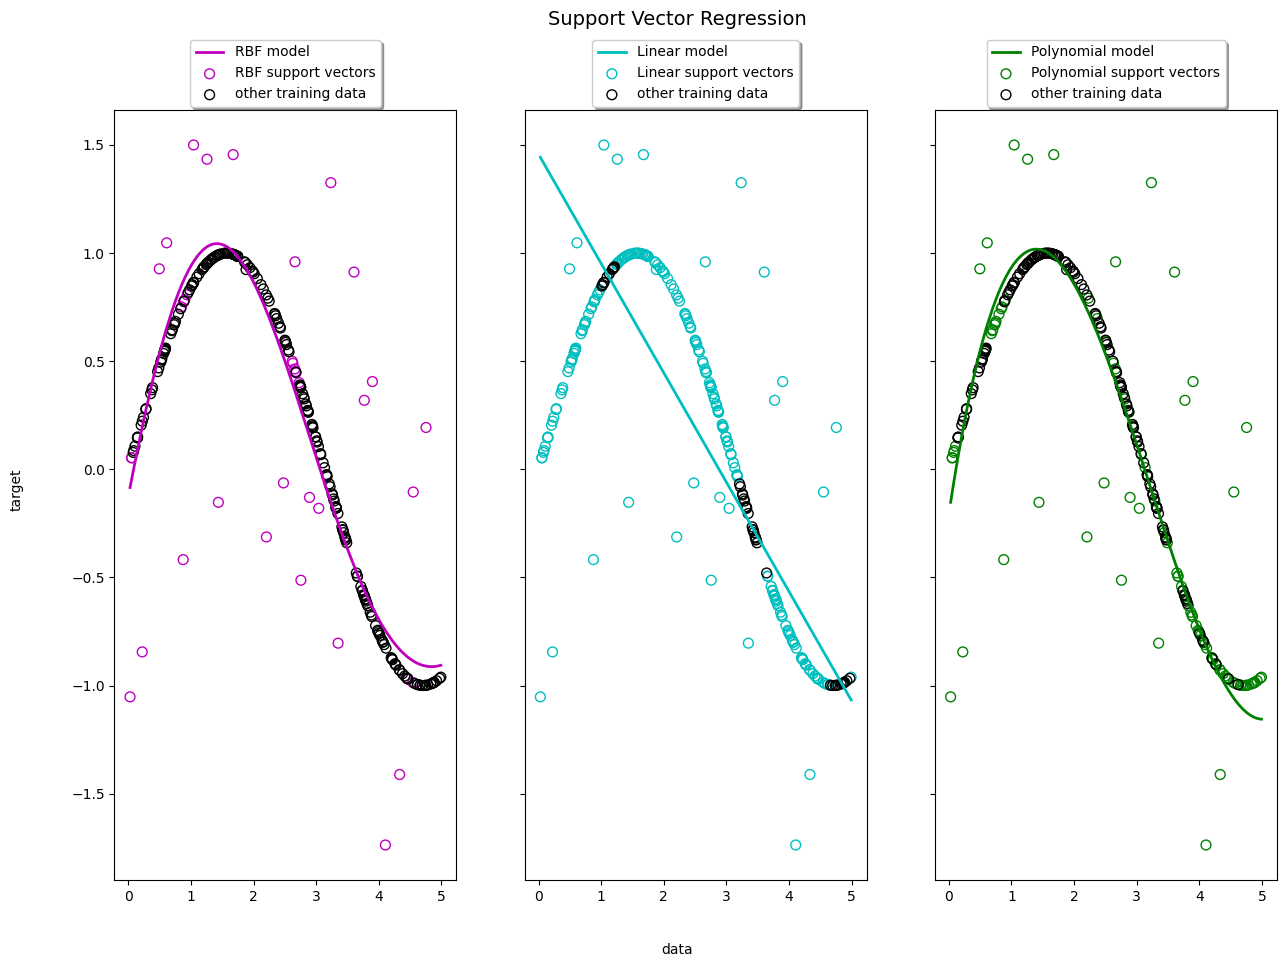

In [5]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## Model overfitting

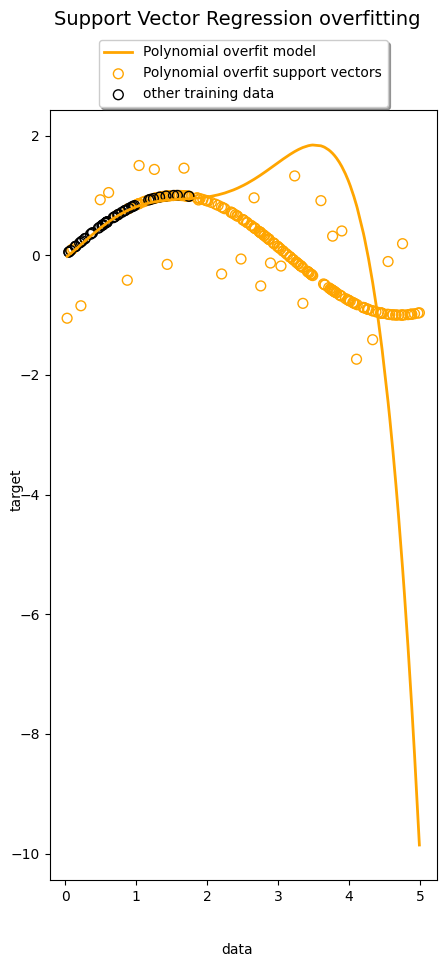

In [6]:
svr_poly_over = SVR(kernel="poly", C=100, gamma="auto", degree=5, epsilon=0.05, coef0=1)

svrs = [svr_poly_over]
kernel_label = ["Polynomial overfit"]
model_color = ["orange"]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
for ix, svr in enumerate(svrs):
    axes.plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes.scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes.scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression overfitting", fontsize=14)
plt.show()

# SVR implentation 2D

## Generate true data samples and plot

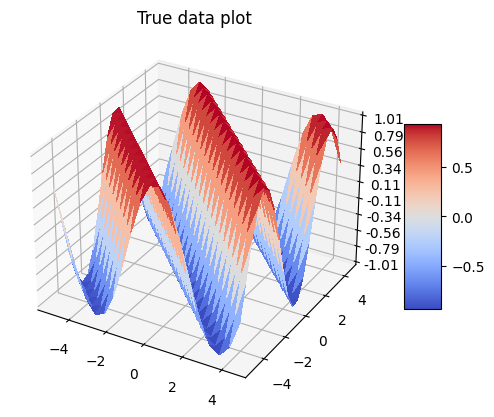

In [7]:
data_config_2d = {
'N_SAMPLES' : 250,
'NOISE_PERCENT': 10,
}

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X+Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('True data plot')
plt.show()


## Add noise to data

In [8]:
Z = np.sin(Z).ravel()

# add noise to targets
sampling = 100 // data_config_1d['NOISE_PERCENT']
noise_len = len(Z[::sampling])
Z[::sampling] += 3 * (0.5 - np.random.rand(noise_len))
Z = Z.reshape(X.shape)

svr_rbf_2d = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin_2d = SVR(kernel="linear", C=100, gamma="auto")
svr_poly_2d = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

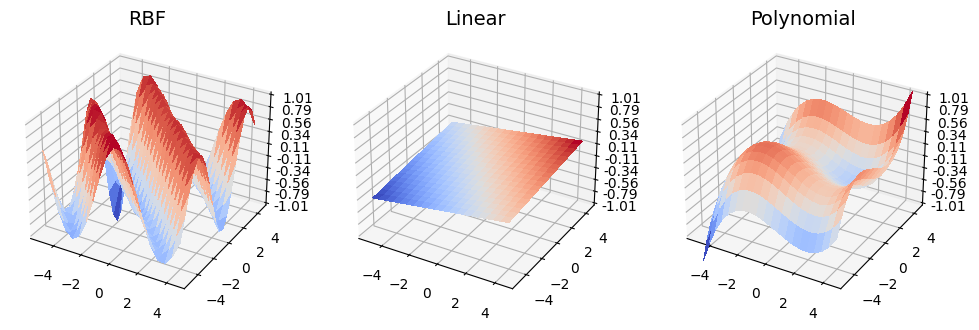

In [9]:
XX = X.reshape((-1,1))
YY = Y.reshape((-1,1))
XY = np.hstack((XX,YY))
ZZ = Z.ravel()

svrs_2d = [svr_rbf_2d, svr_lin_2d, svr_poly_2d]
kernel_label = ["RBF", "Linear", "Polynomial"]

fig, ax = plt.subplots(ncols=3, nrows=1, subplot_kw={"projection": "3d"}, figsize=(12, 12))

for ix, svr in enumerate(svrs_2d):
    # Plot the surface.
    Z_pred = svrs_2d[ix].fit(XY, ZZ).predict(XY).reshape(X.shape)

    surf = ax[ix].plot_surface(X, Y, Z_pred, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

    # Customize the z axis.
    ax[ix].set_zlim(-1.01, 1.01)
    ax[ix].zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax[ix].zaxis.set_major_formatter('{x:.02f}')
    ax[ix].set_title(f'{kernel_label[ix]}', fontsize=14)

plt.show()
